#배달 시간 분석

##1. 배달 시간 데이터 만들기
>아래의 데이터는 A, B, C 식당의 배달 시간을 나열한 것이다. 이를 이용하여 평균 배달 시간을 구해보자

In [1]:
food_a = [20,21,23,22,26,28,35,35,41,42,43,45,44,45,46,47,47,46,47,58,58,59,60,56,57,57,80]
food_b = [5,6,11,13,15,16,20,20,21,23,22,27,27,30,30,32,36,37,40,40,43,44,45,51,54,70,600]
food_c = [5,5,5,12,10,11,20,20,20,20,20,21,20,30,32,31,31,31,36,40,40,51,61,51,61,61,70]

##1.1 평균 구하기

In [6]:
import numpy as np

food_a_mean = np.mean(food_a)
food_b_mean = np.mean(food_b)
food_c_mean = np.mean(food_c)

print(food_a_mean, '{0:.2f}'.format(food_b_mean), round(food_c_mean, 2))

44.0 51.04 30.19


> 실행 결과 가장 빨리 배달되는 곳은 C 음식점임을 알 수 있다. B 식당이 가장 느린것을 알 수 있다.

> B식당의 문제는 배달시간이 600분인 값이 존재한다. 
* 600분이 걸린 이유가 무엇?
* 아 그게 배달 사고로 취소된 것인데 로그가 남아 있었네요

##1.2 중앙값 구하기
> 위의 내용에서 600이라는 이상치가 발견되어 평균값이 올라 갔다. 이를 해결하기 위해 중앙값을 사용할 수 있다.

In [8]:
food_a_median = np.median(food_a)
food_b_median = np.median(food_b)
food_c_median = np.median(food_c)

print(food_a_median, food_b_median, food_c_median)
print(food_a_mean, '{0:.2f}'.format(food_b_mean), round(food_c_mean, 2))

45.0 30.0 30.0
44.0 51.04 30.19


> 현재 A, C식당의 평균과 중앙값의 차이는 크지 않지만 B식당의 평균과 중앙값의 차이는 크다. 이것으로 알 수 있는 것은 B식당에 이상치(정상적이지 않은 값)가 존재한다.

##1.3 데이타 요약
> pandas에 series, dataframe에서 describe()함수를 지원한다. 이 함수는 객체수(count), 평균(mean), 표준편차(std), 사분위수(min~max)값을 확인할 수 있다.

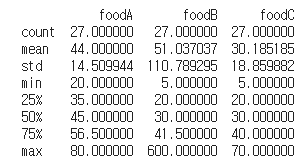

### 1.3.1 진행순서
> 1. List -> series
2. describe 확인
3. 함수화
4. dataframe 변경

###1.3.2 List를 series로 변환

In [ ]:
print(type(food_a))
#series로 변환
import pandas as pd

food_a_series = pd.Series(food_a)
#타입 확인
print(type(food_a_series))

###1.3.3 describe 확인

In [ ]:
food_a_series.describe()

> 1. 전체 배달 건수는 27건(count- 개수)
2. 평균 배달시간 44분(mean- 평균)
3. 보통 14분 정도 더 걸릴 수도 있다. (std- 표준편차)
4. 최소 20에서 최대 80분이 소요되며 25%~75%상의 값이 10정도 차이가 나고 평균과 표준편차의 값으로 유추할 수 있는 것은 25 ~ 75% 사이에 값이 포진되어 있다는 것을 알 수 있다.(min ~ max - 사분위수)

In [ ]:
food_b_series = pd.Series(food_b)
food_b_series.describe()

In [ ]:
food_c_series = pd.Series(food_c)
food_c_series.describe()

###1.3.4 함수화
> 기존에 반복된 코드를 모듈로 만드는 작업

In [24]:
#def 함수 정의 시 앞 부분에 선언
#getDescribe : 함수 이름
#(in_list) : 입력 데이터
def getDescribe(in_list):
  #series 변환
  conv_series = pd.Series(in_list)
  #정보 확인
  # print( conv_series.describe() )
  #값 전달
  return conv_series.describe()

food_b_series = getDescribe(food_b)
food_b_series

count     27.000000
mean      51.037037
std      110.789295
min        5.000000
25%       20.000000
50%       30.000000
75%       41.500000
max      600.000000
dtype: float64

>1. getDescribe() 호출
2. 선언된 getDescribe()함수에 in_list에 good_a 전달
3. 함수 내부 코드 진행
4. return을 통한 결과 반환
5. food_b_series에 반환 결과 저장

###1.3.5 DataFrame 만들기

In [ ]:
df_food = pd.DataFrame()
type(df_food)

> dataframe 생성 시 pandas의 DataFrame 함수를 이용한다.

In [ ]:
df_food['foodA'] = getDescribe(food_a)
df_food['foodB'] = getDescribe(food_b)
df_food['foodC'] = getDescribe(food_c)

df_food

>dataframe에 열 추가 방법
* dataframe_name['추가할 열 이름'] = data

##1.4 사분위수
> 중간값을 좀 더 세분화하여 4등분한 지점으로 값을 표현한 지표가 사분위수이다. 크기순으로 정렬하고 1/4지점을 1사분위 4/4를 4사분위로 나누어 각 지점의 값을 산출한다.


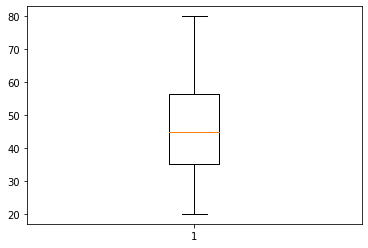

In [30]:
import matplotlib.pyplot as plt
 
plt.boxplot(food_a)
plt.show()

##1.5 이상치
> 기존의 데이터와 많은 차이를 보이는 데이터

>IQR(Interquartile Range)의 1.5배 또는 3배의 차이
* IQR = (3분위수 - 1분위수)

In [37]:
dataset = pd.Series([16,21,22,23,24,25,30])

#percentile(data, 100분위수)
min = np.percentile(dataset, 0)
q1 = np.percentile(dataset, 25)
q2 = np.percentile(dataset, 50)
q3 = np.percentile(dataset, 75)
max = np.percentile(dataset, 100)

In [41]:
iqr = q3-q1
#최저한계치
lowerfence = q1-iqr*1.5
#최대한계치
upperfence = q3+iqr*1.5

#최저한계치 출력
# print(lowerfence)
#최저 한계치를 제외한 나머지 정보 출력
# print(dataset[dataset>lowerfence])
#최소값
# print(dataset[dataset>lowerfence].min())
lowerbar = dataset[dataset>lowerfence].min()
upperbar = dataset[dataset<upperfence].max()

25

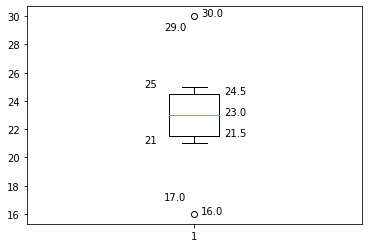

In [47]:
plt.boxplot(dataset)
plt.text(0.91, lowerfence,lowerfence)
plt.text(0.85, lowerbar,lowerbar)
plt.text(1.02, min,min)
plt.text(1.09, q1,q1)
plt.text(1.09, q2,q2)
plt.text(1.09, q3,q3)
plt.text(0.85, upperbar,upperbar)
plt.text(0.91, upperfence,upperfence)
plt.text(1.02, max,max)
plt.show()

> 현재 그림에서는 범위를 벗어난 16과 30을 이상치로 판단한다.

###1.5.1 이상치 제거
> 최저한계치보다 작은 값과 최고 한계치보다 큰 값을 제거

In [ ]:
# dataset
dataset_remove = dataset[dataset>lowerfence]
dataset_remove = dataset_remove[dataset_remove<upperfence]
dataset_remove

###1.5.2 food_b의 이상치 제거(Quiz)
> food_b를 boxplot을 활용하여 이상치 유무를 판단하고 존재한다면 이상치 제거 후 boxplot으로 결과를 확인하시오
1. boxplot을 통한 이상치 확인
2. iqr 만들기
3. 최대, 최저 한계치 구하기
4. 이상치 제거

####1.5.2.1 boxplot을 통한 이상치 확인

In [ ]:
plt.boxplot(food_b)
plt.show()

####1.5.2.2 iqr 만들기

In [54]:
q1 = np.percentile(food_b, 25)
q3 = np.percentile(food_b, 75)
iqr = q3-q1

####1.5.2.3 최대, 최저 한계치 구하기

In [55]:
upperfence = q3 + iqr*1.5

####1.5.2.4 이상치 제거

In [ ]:
#series로 변경
food_b_series = pd.Series(food_b)
#이상치 제거
food_b_remove = food_b_series[food_b_series<upperfence]
food_b_remove.describe()

####1.5.2.5 boxplot 확인

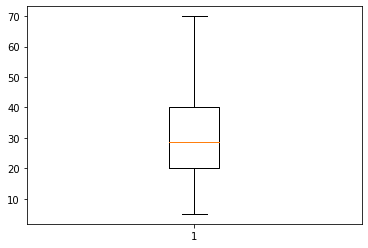

In [62]:
plt.boxplot(food_b_remove)
plt.show()

###1.5.3 이상치 치환
> 이상치 처리 시 데이터가 부족한 경우 제거가 아닌 대표값으로 치환하여 분석할 수 있다.

####1.5.3.1 대표값 구하기

In [67]:
food_b_series = pd.Series(food_b)
food_b_series.describe()

count     27.000000
mean      51.037037
std      110.789295
min        5.000000
25%       20.000000
50%       30.000000
75%       41.500000
max      600.000000
dtype: float64

> 실행 결과 왼쪽의 정보는 index 정보이고 오른쪽 정보는 value이다. 

In [ ]:
food_b_series = pd.Series(food_b)
#loc['index name']
food_b_series.describe().loc['count']

>index 정보를 읽어 들이기 위해 loc를 이용하여 index 이름을 지정하면 값을 얻을 수 있다.

In [ ]:
mean = food_b_series.describe().loc['mean']
median = food_b_series.describe().loc['50%']
print(mean, ', ', median)

>index를 이용하여 대표값인 평균과 중간값  두 가지를 얻을 수 있다.

####1.5.3.2 대표값 치환

In [ ]:
food_b_series[food_b_series>40] = median
# food_b_series.describe()
food_b_series[food_b_series>=30]

####1.5.3.3 Quiz
> 다음 데이터에서 이상치를 대표값으로 치환하시오
* dataset = pd.Series([16,21,22,23,24,25,30])

> 0. 이상치 확인
1. 대표값 선정 - 중간값
2. 최대, 최소 한계치 구하기

#####1.5.3.3.0 이상치 확인

In [ ]:
dataset = pd.Series([16,21,22,23,24,25,30])

plt.boxplot(dataset)
plt.show()

#####1.5.3.3.1 대표값 구하기

In [83]:
dataset.describe()

count     7.000000
mean     23.000000
std       4.242641
min      16.000000
25%      21.500000
50%      23.000000
75%      24.500000
max      30.000000
dtype: float64

In [85]:
median = dataset.describe().loc['50%']
q1 = dataset.describe().loc['25%']
q3 = dataset.describe().loc['75%']

24.5

#####1.5.3.3.2 최저, 최대 한계치

In [88]:
iqr = q3-q1
lowerfence = q1-iqr*1.5
upperfence = q3+iqr*1.5

29.0

In [ ]:
# |(백스페이스키 아래)은 or 연산을 뜻함
dataset[(dataset>upperfence) | (dataset<lowerfence)] = median
dataset

##1.6 결과 확인

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


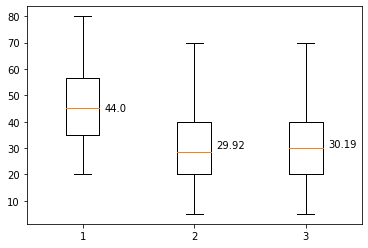

In [95]:
food = [food_a, food_b_remove, food_c]

food_a_mean = round(np.mean(food_a), 2)
food_b_mean = round(np.mean(food_b_remove), 2)
food_c_mean = round(np.mean(food_c), 2)

plt.boxplot(food)
plt.text(1.2, food_a_mean, food_a_mean)
plt.text(2.2, food_b_mean, food_b_mean)
plt.text(3.2, food_c_mean, food_c_mean)
plt.show()